Lab 11: Comparing Ensemble Learning and Neural Networks
on the Breast Cancer Dataset.

Instructions

Use Python in Google Colab to load the Breast Cancer dataset and compare the performance of a Ensemble Learning (GradientBoostingClassifier) and Neural Network. You will analyze their accuracy and generate a confusion matrix for each model.

Expected Output

1. Accuracy and confusion matrix for both Ensemble Learning and Neural Network.

2. Compare the accuracy and confusion matrices of both models.

3. Write a brief summary discussing which model performed better on the Breast Cancer dataset.

In [60]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

X = data.data
y = data.target
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter 

In [61]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Gradient Boosting Classifier (Ensemble Learning)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Initialize and train the Neural Network (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Calculate accuracy for both models
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Generate confusion matrices for both models
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Display the accuracy scores
print("Accuracy of Gradient Boosting Classifier: ", accuracy_gbc)
print("Accuracy of Neural Network: ", accuracy_mlp)

Accuracy of Gradient Boosting Classifier:  0.956140350877193
Accuracy of Neural Network:  0.9385964912280702


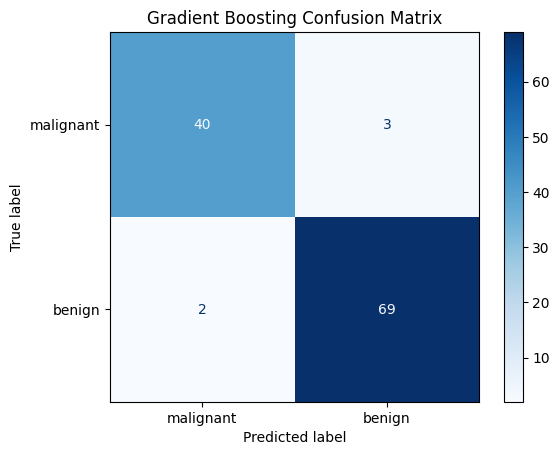

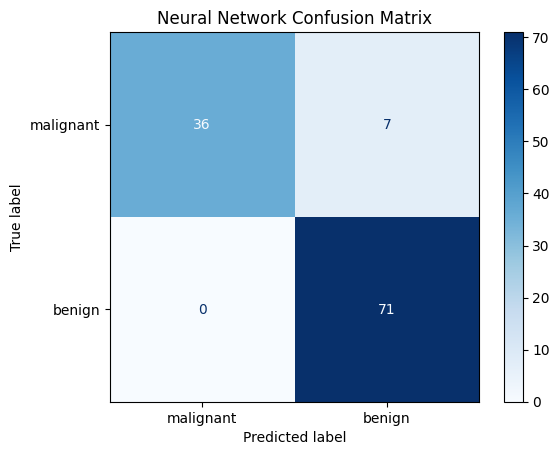

In [62]:
# Plot the confusion matrix for Gradient Boosting
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=data.target_names)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# Plot the confusion matrix for Neural Network
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=data.target_names)
disp_mlp.plot(cmap=plt.cm.Blues)
plt.title("Neural Network Confusion Matrix")
plt.show()

In [63]:
# Comparison of accuracy and confusion matrices
print("Accuracy of Gradient Boosting Classifier: \n           ", accuracy_gbc)
print("Accuracy of Neural Network:\n           ", accuracy_mlp)
if accuracy_gbc > accuracy_mlp:
    print(f"Gradient Boosting performs better than Neural Network. Which is: {accuracy_gbc:.4f}")
else:
 print(f"Neural Network performs better than Gradient Boosting. Which is: {accuracy_mlp:.4f}")

Accuracy of Gradient Boosting Classifier: 
            0.956140350877193
Accuracy of Neural Network:
            0.9385964912280702
Gradient Boosting performs better than Neural Network. Which is: 0.9561


The Gradient Boosting model did better than the Neural Network on the Breast Cancer dataset. It has an accuracy of 95.61, while the Neural Network had 93.86.
This shows that Gradient Boosting performed better for this task.
